# chap2. 데이터 다루기

## 2-1. 훈련 세트와 테스트 세트

- 지도 학습: 훈련하기 위한 데이터와 답이 필요
- 비지도 학습: 타깃 없이 입력 데이터만 사용
-
- 정답: input && target
- train_set = input + target

### 훈련 세트와 테스트 세트

- 테스트 세트: 평가에 사용하는 데이터
- 훈련 세트: 훈련에 사용하는 데이터

In [3]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [5]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [6]:
print(fish_data[4])

[29.0, 430.0]


In [7]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [8]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [12]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [14]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [15]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

### sampling 편향

- 도미와 빙어를 확인하는 머신러닝에서 도미의 값만을 넣고 빙어를 판단할 수 없다. 위와 같은 경우!

### Numpy

In [20]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print('fish_data 크기:',input_arr.shape)
print(input_arr)

fish_data 크기: (49, 2)
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [25]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [26]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [30]:
# train set을 index를 이용해 무작위로 섞기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [38]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

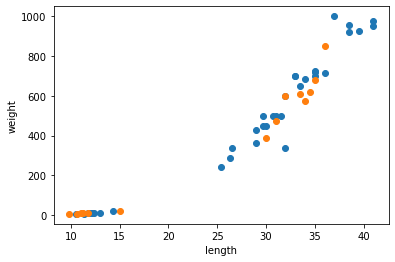

In [39]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 두 번째 머신러닝 프로그램

In [40]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [41]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [42]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [43]:
kn.predict(test_input) == test_target

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

### 훈련 모델 평가

- numpy의 shuffle을 이용해 인덱스를 만들어주고, 무작위로 섞인 데이터를 학습시켜 정확도를 높임

## 2-2. 데이터 전처리

### numpy로 데이터 준비

In [50]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [51]:
# 전달 받은 리스트 2개를 합칠 수 있다.
import numpy as np

np.column_stack(([1, 2, 3], [4, 5, 6])) 

array([[1, 4],
       [2, 5],
       [3, 6]])

In [54]:
fish_data = np.column_stack((fish_length, fish_weight))

In [55]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [56]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [59]:
# 리스트 2개를 그냥 앞뒤로 연결만 시켜줌
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [60]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### sklearn으로 trainset 과 testset으로 나누기

In [62]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [65]:
print('train_input 크기:', train_input.shape)
print('test_input 크기:', test_input.shape)

train_input 크기: (36, 2)
test_input 크기: (13, 2)


In [66]:
print('train_target 크기:', train_target.shape)
print('test_target 크기:', test_target.shape)

train_target 크기: (36,)
test_target 크기: (13,)


In [67]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [68]:
# 클래스의 비율에 맞게 데이터를 나눔 : 데이터의 개수가 적을 때 유용
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,stratify=fish_target, random_state=42)

In [69]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

### 수상한 도미 한마리

In [70]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [75]:
print(kn.predict([[25, 150]]))

[0.]


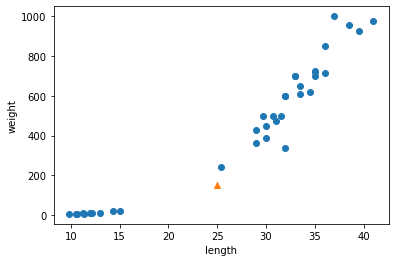

In [76]:
# 예측 실패! why? 확인!

import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

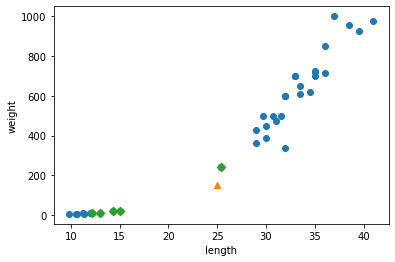

In [77]:
# 분명히 도미에 가까운데 왜 오차가 생겼는가? -> knneighbor은 가까운 5개의 데이터를 받아들이기 때문

distance, indexes = kn.kneighbors([[25, 150]]) # kneighbors에

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [78]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [79]:
print(train_target[indexes]) # 위와 이 코드이 결과로 kneighbor에 잡힌 5개의 자료가 1개의 도미 4개의 빙어로 이루어져 있음을 알 수 있다. 따라서 오차가 생겼음

[[1. 0. 0. 0. 0.]]


In [80]:
print(distance)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### 기준을 맞춰라

- 그래프 상의 거리와 distance를 통해 잡혀진 거리가 차이가 심하기 때문에 거리를 맞춰줄 필요가 있다.

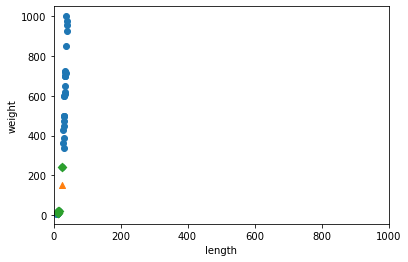

In [81]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlim((0,1000)) ## x축의 범위 지정 -> y축과 같은 범위로 지정해 주었지만 x축 상에서의 편차가 크지 않아 의미가 없음.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 샘플간의 거리가 큰 영향을 미치기 때문에 제대로 사용하기 위해서는 기준을 가지고 맞춰주어야함 -> 이 과정이 '데이터 전처리'
- 표준 점수: 널리 사용하는 데이터 전처리 방법, 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄, 이를 통해 특성값의 크기와 상관 없이 동일한 조건으로 비교가능

In [83]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [84]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [86]:
# numpy를 이용한 broadcasting: 쉽게 각 모든 행과 연산이 된다.
train_scaled = (train_input - mean) / std

### 전처리 데이터로 모델 훈련

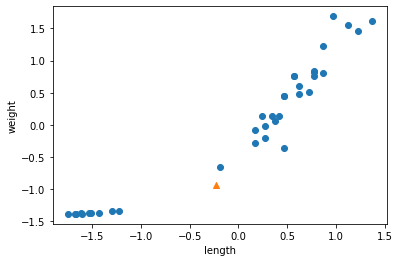

In [89]:
new = ([25, 150] - mean) / std # 반드시 훈련 모델의 평균과 표준편차로 계산해야함.

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [90]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [93]:
# 평가
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [95]:
# 정확한 예측 수행
kn.predict([new])

array([1.])

### 스케일이 다른 특성 처리

- 길이와 무게의 scale이 다르기 때문에 정확한 예측을 할 수 없었음.
- 일반적으로 머신러닝 알고리즘은 스케일이 다르면 잘 돌아가지 않음.
- 표준 점수를 제외하고도 다양한 방법이 존재, 하지만 일반적으로 표준점수를 이용하면 거의 해결이 가능함.